In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [67]:
# FOLDERS = [
#     "./ae_baseline_mfcc13",
#     "./race_step1/1",
#     "./race_step1/2",
#     "./race_50units_mlp_aggregated_s/1",
#     "./race_50units_mlp_aggregated_s/2",
#     "./ecae/1",
#     "./ecae/2",
#     # "/home/workstation163/Documents/FGCS_dcase/my_tests/results/best_ae_baseline_mfcc13",
# ]

In [68]:
FOLDERS = [
    "./ae_baseline_mfcc13",
    "./ae_baseline_melspec",
    "./direct_test_step1/1",
    "./direct_test_step1/2",
    "./direct_test_step2/1",
    "./direct_test_step2/2",
    "./ecae/1",
    "./ecae/2",
    # "/home/workstation163/Documents/FGCS_dcase/my_tests/results/best_ae_baseline_mfcc13",
]

In [69]:
def list_files(folder):
    """
    List all files in the given folder.
    """
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

def read_csv(file_path):
    """
    Read a CSV file and return a DataFrame.
    """
    asset_name = os.path.basename(file_path).split(".")[0]
    asset_name = asset_name.split("_")[0]
    try:
        df = pd.read_csv(file_path)
        return asset_name, df
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

In [70]:
dnn_ae_files = list_files(FOLDERS[0])
dnn_ae_melspec_files = list_files(FOLDERS[1])
rc_1layers_files = list_files(FOLDERS[2])
rc_2layers_files = list_files(FOLDERS[3])
rc_1layers_files_no_search_best = list_files(FOLDERS[4])
rc_2layers_files_no_search_best = list_files(FOLDERS[5])
ecae_1layers_files = list_files(FOLDERS[6])
ecae_2layers_files = list_files(FOLDERS[7])

# filter files ending with results.csv
dnn_ae_files = [f for f in dnn_ae_files if f.endswith("results.csv")]
dnn_ae_melspec_files = [f for f in dnn_ae_melspec_files if f.endswith("results.csv")]
rc_1layers_files = [f for f in rc_1layers_files if f.endswith("results.csv")]
rc_2layers_files = [f for f in rc_2layers_files if f.endswith("results.csv")]
rc_1layers_files_no_search_best = [f for f in rc_1layers_files_no_search_best if f.endswith("results.csv")]
rc_2layers_files_no_search_best = [f for f in rc_2layers_files_no_search_best if f.endswith("results.csv")]
ecae_1layers_files = [f for f in ecae_1layers_files if f.endswith("results.csv")]
ecae_2layers_files = [f for f in ecae_2layers_files if f.endswith("results.csv")]
# dnn_ae_files_best = [f for f in dnn_ae_files_best if f.endswith("results.csv")]

In [71]:
dnn_ae_files

['./ae_baseline_mfcc13/shaker_results.csv',
 './ae_baseline_mfcc13/bandsaw_results.csv',
 './ae_baseline_mfcc13/ToyTrain_results.csv',
 './ae_baseline_mfcc13/ToyCar_results.csv',
 './ae_baseline_mfcc13/ToyTank_results.csv',
 './ae_baseline_mfcc13/Vacuum_results.csv',
 './ae_baseline_mfcc13/valve_results.csv',
 './ae_baseline_mfcc13/slider_results.csv',
 './ae_baseline_mfcc13/gearbox_results.csv',
 './ae_baseline_mfcc13/grinder_results.csv',
 './ae_baseline_mfcc13/fan_results.csv',
 './ae_baseline_mfcc13/ToyNscale_results.csv',
 './ae_baseline_mfcc13/ToyDrone_results.csv',
 './ae_baseline_mfcc13/bearing_results.csv']

In [72]:
dict_dnn_ae_dfs = dict()
dict_dnn_ae_melspec_dfs = dict()
dict_rc_1layers_dfs = dict()
dict_rc_2layers_dfs = dict()
dict_rc_1layers_no_search_dfs_best = dict()
dict_rc_2layers_no_search_dfs_best = dict()
dict_dnn_ae_dfs_best = dict()
dict_ecae_1layers_dfs = dict()
dict_ecae_2layers_dfs = dict()
for file in dnn_ae_files:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_dnn_ae_dfs[asset_name] = df
for file in dnn_ae_melspec_files:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_dnn_ae_melspec_dfs[asset_name] = df
for file in rc_1layers_files:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_rc_1layers_dfs[asset_name] = df
for file in rc_2layers_files:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_rc_2layers_dfs[asset_name] = df
for file in rc_1layers_files_no_search_best:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_rc_1layers_no_search_dfs_best[asset_name] = df
for file in rc_2layers_files_no_search_best:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_rc_2layers_no_search_dfs_best[asset_name] = df
for file in ecae_1layers_files:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_ecae_1layers_dfs[asset_name] = df
for file in ecae_2layers_files:
    asset_name, df = read_csv(file)
    if df is not None:
        dict_ecae_2layers_dfs[asset_name] = df


In [73]:
dict_ecae_2layers_dfs["ToyNscale"]["auc_score"]

0    0.5012
Name: auc_score, dtype: float64

In [74]:
dict_ecae_2layers_dfs["fan"]["auc_score"]

0    0.5148
Name: auc_score, dtype: float64

In [75]:
dict_rc_1layers_no_search_dfs_best.keys()

dict_keys(['shaker', 'bandsaw', 'ToyTrain', 'ToyCar', 'ToyTank', 'Vacuum', 'valve', 'slider', 'gearbox', 'grinder', 'fan', 'ToyNscale', 'ToyDrone', 'bearing'])

In [76]:
dnn_metrics = dict_dnn_ae_dfs["fan"].columns
dnn_metrics

Index(['true_positive', 'true_negative', 'false_positive', 'false_negative',
       'accuracy', 'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1',
       'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1',
       'normal_precision', 'normal_recall', 'normal_f1', 'anomaly_precision',
       'anomaly_recall', 'anomaly_f1', 'auc_score', 'pauc_score', 'asset_name',
       'model_name', 'train_time_seconds', 'predict_time_seconds',
       'start_train_time', 'end_train_time', 'start_predict_time',
       'end_predict_time', 'n_model_parameters', 'anomaly_threshold',
       'anomaly_percentile', 'n_mfcc', 'sr', 'seed', 'model_size_bytes',
       'macs', 'params_thop'],
      dtype='object')

In [77]:
dict_dnn_ae_melspec_dfs

{'shaker':    true_positive  true_negative  false_positive  false_negative  auc_score  \
 0              3             92               9              96   0.513651   
 
    pauc_score  start_train_time  end_train_time  start_prediction_time  \
 0    0.485054      1.748175e+09    1.748175e+09           1.748175e+09   
 
    end_prediction_time  ...  weighted_avg_f1  normal_precision normal_recall  \
 0         1.748175e+09  ...         0.348279          0.489362      0.910891   
 
    normal_f1  anomaly_precision  anomaly_recall  anomaly_f1      macs  \
 0   0.636678               0.25        0.030303    0.054054  268320.0   
 
    params_thop  model_size_bytes  
 0     267928.0           4379675  
 
 [1 rows x 30 columns],
 'bandsaw':    true_positive  true_negative  false_positive  false_negative  auc_score  \
 0              4            119               8              69   0.540503   
 
    pauc_score  start_train_time  end_train_time  start_prediction_time  \
 0    0.501615      

In [78]:
dict_rc_2layers_dfs["ToyCar"]

,mlp_training_time,start_training_time,end_training_time,mlp_prediction_time,start_prediction_time,end_prediction_time,anomaly_threshold,avg_train_error,true_positive,true_negative,...,pauc_score,accuracy,macro_avg_f1,weighted_avg_f1,total_processing_time,model_name,hps_origin,macs_model_readout,n_model_parameters_readout,model_size_bytes
0,53.622359,1.748432e+09,1.748432e+09,0.010246,1.748432e+09,1.748432e+09,0.006099,0.002231,61,42,...,0.497368,0.515,0.510583,0.510583,63.527853,AENet_Aggregated_MLP_DirectHP,ToyCar (2),5664,5773,155508


[0.5154515451545154, 0.4981123934850609, 0.5197, 0.5512, 0.5798, 0.7162999999999999, 0.5397, 0.8263000000000001, 0.6309, 0.6520672310145993, 0.6666000000000001, 0.6039, 0.5539000000000001, 0.6403000000000001]


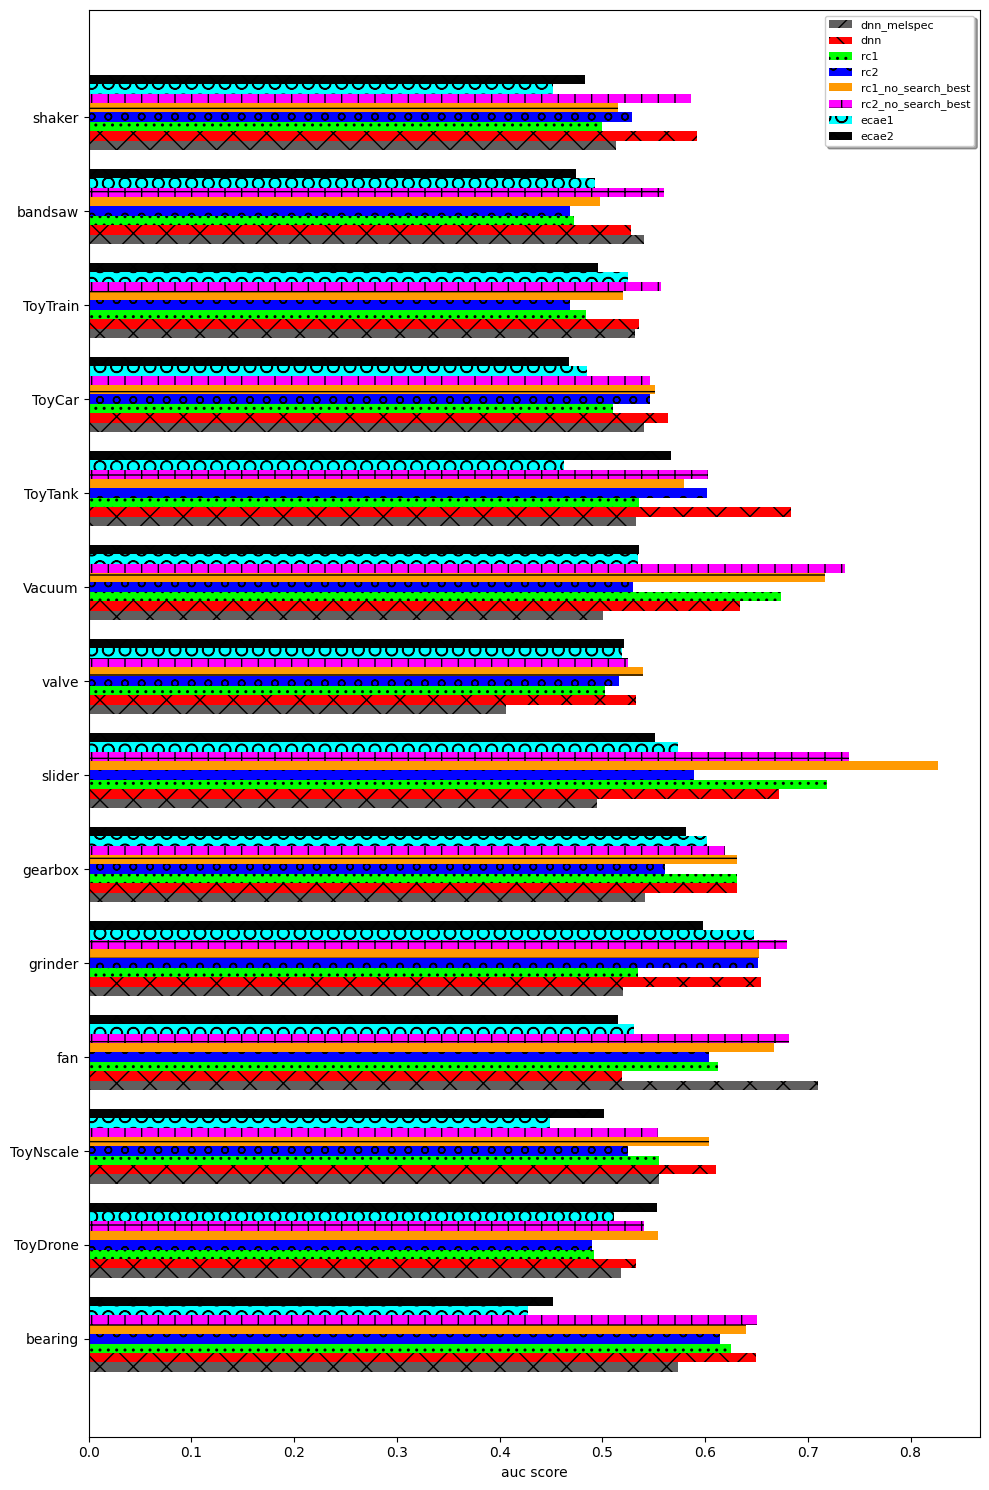

In [79]:
import matplotlib.pyplot as plt

colors = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FF9900",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#000000",  # Black
    "#5E5D5D",  # White
]

hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
]

asset_names = dict_dnn_ae_dfs.keys()

auc_score_dnn = []
auc_score_dnn_melspec = []
auc_score_rc_1layers = []
auc_score_rc_2layers = []
auc_score_rc_1layers_no_search = []
auc_score_rc_2layers_no_search = []
auc_score_ecae_1layers = []
auc_score_ecae_2layers = []

for asset_name in asset_names:
    auc_score_dnn.append(dict_dnn_ae_dfs[asset_name]["auc_score"].values[0])
    auc_score_dnn_melspec.append(dict_dnn_ae_melspec_dfs[asset_name]["auc_score"].values[0])
    auc_score_rc_1layers.append(dict_rc_1layers_dfs[asset_name]["auc_score"].values[0] )
    auc_score_rc_2layers.append(dict_rc_2layers_dfs[asset_name]["auc_score"].values[0])
    auc_score_rc_1layers_no_search.append(dict_rc_1layers_no_search_dfs_best[asset_name]["auc_score"].values[0])
    auc_score_rc_2layers_no_search.append(dict_rc_2layers_no_search_dfs_best[asset_name]["auc_score"].values[0])
    auc_score_ecae_1layers.append(dict_ecae_1layers_dfs[asset_name]["auc_score"].values[0])
    auc_score_ecae_2layers.append(dict_ecae_2layers_dfs[asset_name]["auc_score"].values[0])

categories = asset_names
y_pos = np.arange(len(categories))

# Plot
bar_width = 0.1
fig, ax = plt.subplots(figsize=(10, 15))

print(auc_score_rc_1layers_no_search)

# Clustered bars
ax.barh(y_pos + bar_width * 3, auc_score_dnn_melspec, bar_width, label="dnn_melspec", color=colors[7], hatch=hatchs[6], alpha=0.99)
ax.barh(y_pos + bar_width * 2, auc_score_dnn, bar_width, label="dnn", color=colors[0], hatch=hatchs[1], alpha=0.99)
ax.barh(y_pos + bar_width, auc_score_rc_1layers, bar_width, label="rc1", color=colors[1], hatch=hatchs[0], alpha=0.99)
ax.barh(y_pos, auc_score_rc_2layers, bar_width, label="rc2", color=colors[2], hatch=hatchs[2], alpha=0.99)
ax.barh(y_pos - bar_width, auc_score_rc_1layers_no_search, bar_width, label="rc1_no_search_best", color=colors[3], hatch=hatchs[3], alpha=0.99)
ax.barh(y_pos - bar_width * 2, auc_score_rc_2layers_no_search, bar_width, label="rc2_no_search_best", color=colors[4], hatch=hatchs[4], alpha=0.99)
ax.barh(y_pos - bar_width * 3, auc_score_ecae_1layers, bar_width, label="ecae1", color=colors[5], hatch=hatchs[5], alpha=0.99)
ax.barh(y_pos - bar_width * 4, auc_score_ecae_2layers, bar_width, label="ecae2", color=colors[6], hatch=hatchs[6], alpha=0.99)

# Labels and title
ax.set_xlabel('auc score')
# ax.set_title('Power Consumption by Search Strategy and Dataset')
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()
# ax.legend(loc='center', bbox_to_anchor=(0.4, -0.3), fancybox=True, shadow=True, ncol=2, fontsize=8)
ax.legend(loc='upper right', fancybox=True, shadow=True, ncol=1, fontsize=8)

# Show plot
plt.tight_layout()
# plt.show()

plt.savefig("power_consumption.pdf", bbox_inches='tight')

[0.5154515451545154, 0.4981123934850609, 0.5197, 0.5512, 0.5798, 0.7162999999999999, 0.5397, 0.8263000000000001, 0.6309, 0.6520672310145993, 0.6666000000000001, 0.6039, 0.5539000000000001, 0.6403000000000001]


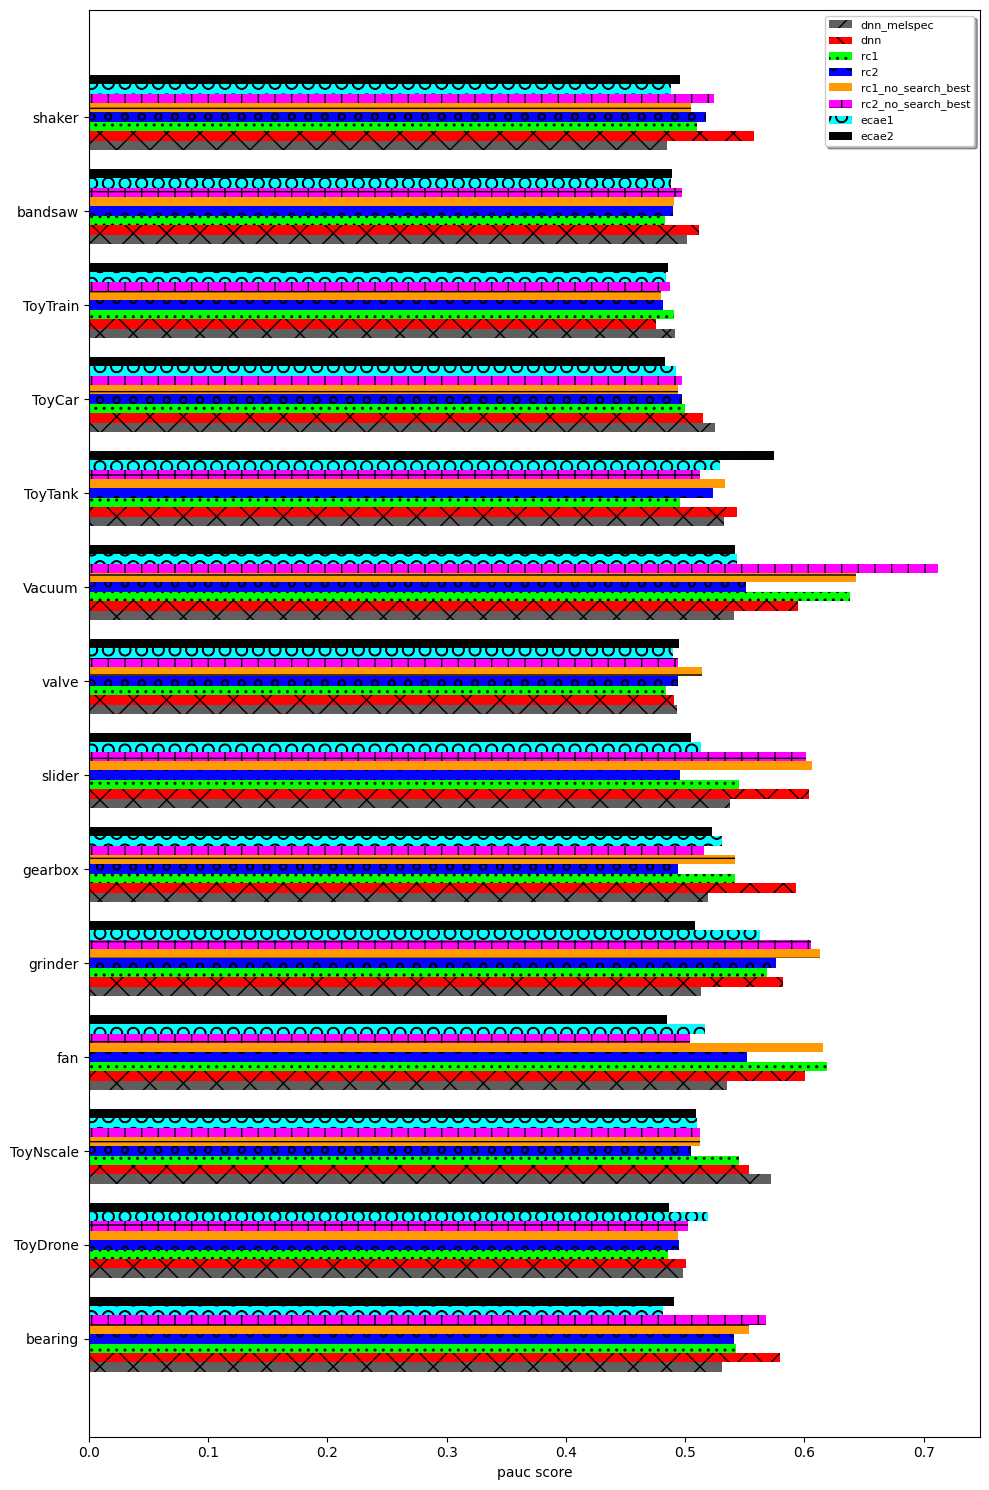

In [80]:
import matplotlib.pyplot as plt

colors = [
    "#FF0000",  # Red
    "#00FF00",  # Green
    "#0000FF",  # Blue
    "#FF9900",  # Yellow
    "#FF00FF",  # Magenta
    "#00FFFF",  # Cyan
    "#000000",  # Black
    "#5E5D5D",  # White
]

hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
]

asset_names = dict_dnn_ae_dfs.keys()

pauc_score_dnn = []
pauc_score_dnn_melspec = []
pauc_score_rc_1layers = []
pauc_score_rc_2layers = []
pauc_score_rc_1layers_no_search = []
pauc_score_rc_2layers_no_search = []
pauc_score_ecae_1layers = []
pauc_score_ecae_2layers = []

for asset_name in asset_names:
    pauc_score_dnn.append(dict_dnn_ae_dfs[asset_name]["pauc_score"].values[0])
    pauc_score_dnn_melspec.append(dict_dnn_ae_melspec_dfs[asset_name]["pauc_score"].values[0])
    pauc_score_rc_1layers.append(dict_rc_1layers_dfs[asset_name]["pauc_score"].values[0] )
    pauc_score_rc_2layers.append(dict_rc_2layers_dfs[asset_name]["pauc_score"].values[0])
    pauc_score_rc_1layers_no_search.append(dict_rc_1layers_no_search_dfs_best[asset_name]["pauc_score"].values[0])
    pauc_score_rc_2layers_no_search.append(dict_rc_2layers_no_search_dfs_best[asset_name]["pauc_score"].values[0])
    pauc_score_ecae_1layers.append(dict_ecae_1layers_dfs[asset_name]["pauc_score"].values[0])
    pauc_score_ecae_2layers.append(dict_ecae_2layers_dfs[asset_name]["pauc_score"].values[0])

categories = asset_names
y_pos = np.arange(len(categories))

# Plot
bar_width = 0.1
fig, ax = plt.subplots(figsize=(10, 15))

print(auc_score_rc_1layers_no_search)

# Clustered bars
ax.barh(y_pos + bar_width * 3, pauc_score_dnn_melspec, bar_width, label="dnn_melspec", color=colors[7], hatch=hatchs[6], alpha=0.99)
ax.barh(y_pos + bar_width * 2, pauc_score_dnn, bar_width, label="dnn", color=colors[0], hatch=hatchs[1], alpha=0.99)
ax.barh(y_pos + bar_width, pauc_score_rc_1layers, bar_width, label="rc1", color=colors[1], hatch=hatchs[0], alpha=0.99)
ax.barh(y_pos, pauc_score_rc_2layers, bar_width, label="rc2", color=colors[2], hatch=hatchs[2], alpha=0.99)
ax.barh(y_pos - bar_width, pauc_score_rc_1layers_no_search, bar_width, label="rc1_no_search_best", color=colors[3], hatch=hatchs[3], alpha=0.99)
ax.barh(y_pos - bar_width * 2, pauc_score_rc_2layers_no_search, bar_width, label="rc2_no_search_best", color=colors[4], hatch=hatchs[4], alpha=0.99)
ax.barh(y_pos - bar_width * 3, pauc_score_ecae_1layers, bar_width, label="ecae1", color=colors[5], hatch=hatchs[5], alpha=0.99)
ax.barh(y_pos - bar_width * 4, pauc_score_ecae_2layers, bar_width, label="ecae2", color=colors[6], hatch=hatchs[6], alpha=0.99)

# Labels and title
ax.set_xlabel('pauc score')
# ax.set_title('Power Consumption by Search Strategy and Dataset')
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()
# ax.legend(loc='center', bbox_to_anchor=(0.4, -0.3), fancybox=True, shadow=True, ncol=2, fontsize=8)
ax.legend(loc='upper right', fancybox=True, shadow=True, ncol=1, fontsize=8)

# Show plot
plt.tight_layout()
# plt.show()

plt.savefig("power_consumption.pdf", bbox_inches='tight')

In [81]:
dict_dnn_ae_dfs.keys()

dict_keys(['shaker', 'bandsaw', 'ToyTrain', 'ToyCar', 'ToyTank', 'Vacuum', 'valve', 'slider', 'gearbox', 'grinder', 'fan', 'ToyNscale', 'ToyDrone', 'bearing'])

In [82]:
for asset in asset_names:
    print("ASSET:", asset)
    print("dnn_melspec:", dict_dnn_ae_melspec_dfs[asset]["auc_score"].values[0])
    print("dnn:", dict_dnn_ae_dfs[asset]["auc_score"].values[0])
    print("ecae_1layers:", dict_ecae_1layers_dfs[asset]["auc_score"].values[0])
    print("ecae_2layers:", dict_ecae_2layers_dfs[asset]["auc_score"].values[0]) 
    print("rc_1layers:", dict_rc_1layers_dfs[asset]["auc_score"].values[0])
    print("rc_2layers:", dict_rc_2layers_dfs[asset]["auc_score"].values[0])
    print("rc_1layers_no_search_best:", dict_rc_1layers_no_search_dfs_best[asset]["auc_score"].values[0])
    print("rc_2layers_no_search_best:", dict_rc_2layers_no_search_dfs_best[asset]["auc_score"].values[0])
    print("\n")

ASSET: shaker
dnn_melspec: 0.5136513651365137
dnn: 0.591959195919592
ecae_1layers: 0.4515451545154515
ecae_2layers: 0.4835483548354835
rc_1layers: 0.4997499749974997
rc_2layers: 0.5292529252925293
rc_1layers_no_search_best: 0.5154515451545154
rc_2layers_no_search_best: 0.5858585858585859


ASSET: bandsaw
dnn_melspec: 0.5405026426491208
dnn: 0.5280983712652355
ecae_1layers: 0.4926113687843813
ecae_2layers: 0.4747060726998167
rc_1layers: 0.4721173551936145
rc_2layers: 0.4683421421637364
rc_1layers_no_search_best: 0.4981123934850609
rc_2layers_no_search_best: 0.5604573400927624


ASSET: ToyTrain
dnn_melspec: 0.5313000000000001
dnn: 0.5360999999999999
ecae_1layers: 0.5254000000000001
ecae_2layers: 0.4961
rc_1layers: 0.4836
rc_2layers: 0.4687
rc_1layers_no_search_best: 0.5197
rc_2layers_no_search_best: 0.5572


ASSET: ToyCar
dnn_melspec: 0.5403
dnn: 0.5638
ecae_1layers: 0.4846
ecae_2layers: 0.4673
rc_1layers: 0.5098999999999999
rc_2layers: 0.5463
rc_1layers_no_search_best: 0.5512
rc_2layers

In [83]:

for asset in asset_names:
    # round the values to 2 decimal places
    dict_dnn_ae_melspec_dfs[asset]["pauc_score"] = dict_dnn_ae_melspec_dfs[asset]["pauc_score"].round(3)
    dict_dnn_ae_dfs[asset]["pauc_score"] = dict_dnn_ae_dfs[asset]["pauc_score"].round(3)
    dict_ecae_1layers_dfs[asset]["pauc_score"] = dict_ecae_1layers_dfs[asset]["pauc_score"].round(3)
    dict_ecae_2layers_dfs[asset]["pauc_score"] = dict_ecae_2layers_dfs[asset]["pauc_score"].round(3)
    dict_rc_1layers_dfs[asset]["pauc_score"] = dict_rc_1layers_dfs[asset]["pauc_score"].round(3)
    dict_rc_2layers_dfs[asset]["pauc_score"] = dict_rc_2layers_dfs[asset]["pauc_score"].round(3)
    dict_rc_1layers_no_search_dfs_best[asset]["pauc_score"] = dict_rc_1layers_no_search_dfs_best[asset]["pauc_score"].round(3)
    dict_rc_2layers_no_search_dfs_best[asset]["pauc_score"] = dict_rc_2layers_no_search_dfs_best[asset]["pauc_score"].round(3)

    print("ASSET:", asset)
    print("dnn_melspec:", dict_dnn_ae_melspec_dfs[asset]["pauc_score"].values[0])
    print("dnn:", dict_dnn_ae_dfs[asset]["pauc_score"].values[0])
    print("ecae_1layers:", dict_ecae_1layers_dfs[asset]["pauc_score"].values[0])
    print("ecae_2layers:", dict_ecae_2layers_dfs[asset]["pauc_score"].values[0]) 
    print("rc_1layers:", dict_rc_1layers_dfs[asset]["pauc_score"].values[0])
    print("rc_2layers:", dict_rc_2layers_dfs[asset]["pauc_score"].values[0])
    print("rc_1layers_no_search_best:", dict_rc_1layers_no_search_dfs_best[asset]["pauc_score"].values[0])
    print("rc_2layers_no_search_best:", dict_rc_2layers_no_search_dfs_best[asset]["pauc_score"].values[0])
    print("\n")

ASSET: shaker
dnn_melspec: 0.485
dnn: 0.558
ecae_1layers: 0.488
ecae_2layers: 0.495
rc_1layers: 0.51
rc_2layers: 0.517
rc_1layers_no_search_best: 0.505
rc_2layers_no_search_best: 0.524


ASSET: bandsaw
dnn_melspec: 0.502
dnn: 0.512
ecae_1layers: 0.488
ecae_2layers: 0.489
rc_1layers: 0.483
rc_2layers: 0.49
rc_1layers_no_search_best: 0.491
rc_2layers_no_search_best: 0.498


ASSET: ToyTrain
dnn_melspec: 0.492
dnn: 0.476
ecae_1layers: 0.484
ecae_2layers: 0.486
rc_1layers: 0.491
rc_2layers: 0.482
rc_1layers_no_search_best: 0.479
rc_2layers_no_search_best: 0.487


ASSET: ToyCar
dnn_melspec: 0.525
dnn: 0.515
ecae_1layers: 0.493
ecae_2layers: 0.483
rc_1layers: 0.5
rc_2layers: 0.497
rc_1layers_no_search_best: 0.494
rc_2layers_no_search_best: 0.497


ASSET: ToyTank
dnn_melspec: 0.533
dnn: 0.544
ecae_1layers: 0.529
ecae_2layers: 0.575
rc_1layers: 0.495
rc_2layers: 0.524
rc_1layers_no_search_best: 0.533
rc_2layers_no_search_best: 0.513


ASSET: Vacuum
dnn_melspec: 0.541
dnn: 0.594
ecae_1layers: 0.

In [84]:
dict_dnn_ae_melspec_dfs["fan"].columns

Index(['true_positive', 'true_negative', 'false_positive', 'false_negative',
       'auc_score', 'pauc_score', 'start_train_time', 'end_train_time',
       'start_prediction_time', 'end_prediction_time', 'train_time_s',
       'pred_time_s', 'model_name', 'n_model_parameters', 'accuracy',
       'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1',
       'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1',
       'normal_precision', 'normal_recall', 'normal_f1', 'anomaly_precision',
       'anomaly_recall', 'anomaly_f1', 'macs', 'params_thop',
       'model_size_bytes'],
      dtype='object')

In [85]:
dict_dnn_ae_dfs["fan"].columns

Index(['true_positive', 'true_negative', 'false_positive', 'false_negative',
       'accuracy', 'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1',
       'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1',
       'normal_precision', 'normal_recall', 'normal_f1', 'anomaly_precision',
       'anomaly_recall', 'anomaly_f1', 'auc_score', 'pauc_score', 'asset_name',
       'model_name', 'train_time_seconds', 'predict_time_seconds',
       'start_train_time', 'end_train_time', 'start_predict_time',
       'end_predict_time', 'n_model_parameters', 'anomaly_threshold',
       'anomaly_percentile', 'n_mfcc', 'sr', 'seed', 'model_size_bytes',
       'macs', 'params_thop'],
      dtype='object')

In [86]:
dict_ecae_1layers_dfs["fan"].columns

Index(['max_timesteps_for_cae_padding', 'original_feature_dim (N_MFCC)',
       'start_cae_training_time', 'end_cae_training_time', 'cae_training_time',
       'cae_latent_dim', 'macs_cae', 'n_params_cae', 'start_hp_search_time',
       'end_hp_search_time', 'rc_hp_search_time',
       'start_mlp_latent_reconstructor_training_time',
       'end_mlp_latent_reconstructor_training_time',
       'final_mlp_latent_reconstructor_training_time', 'macs_mlp_readout',
       'n_params_mlp_readout', 'anomaly_threshold_on_latent_error',
       'true_positive', 'true_negative', 'false_positive', 'false_negative',
       'auc_score', 'pauc_score', 'accuracy', 'macro_avg_precision',
       'macro_avg_recall', 'macro_avg_f1', 'weighted_avg_precision',
       'weighted_avg_recall', 'weighted_avg_f1', 'normal_precision',
       'normal_recall', 'normal_f1', 'anomaly_precision', 'anomaly_recall',
       'anomaly_f1', 'asset_name', 'n_rc_layers', 'model_architecture',
       'n_params_total_trained_approx

In [87]:
dict_rc_1layers_dfs["ToyCar"].columns

Index(['mlp_training_time', 'start_training_time', 'end_training_time',
       'mlp_prediction_time', 'start_prediction_time', 'end_prediction_time',
       'anomaly_threshold', 'avg_train_error', 'true_positive',
       'true_negative', 'false_positive', 'false_negative', 'auc_score',
       'pauc_score', 'accuracy', 'macro_avg_f1', 'weighted_avg_f1',
       'total_processing_time', 'model_name', 'hps_origin',
       'macs_model_readout', 'n_model_parameters_readout', 'model_size_bytes'],
      dtype='object')

In [88]:
for asset in asset_names:
    # round the values to 2 decimal places
    dict_dnn_ae_melspec_dfs[asset]["pauc_score"] = dict_dnn_ae_melspec_dfs[asset]["pauc_score"].round(3)
    dict_dnn_ae_dfs[asset]["pauc_score"] = dict_dnn_ae_dfs[asset]["pauc_score"].round(3)
    dict_ecae_1layers_dfs[asset]["pauc_score"] = dict_ecae_1layers_dfs[asset]["pauc_score"].round(3)
    dict_ecae_2layers_dfs[asset]["pauc_score"] = dict_ecae_2layers_dfs[asset]["pauc_score"].round(3)
    dict_rc_1layers_dfs[asset]["pauc_score"] = dict_rc_1layers_dfs[asset]["pauc_score"].round(3)
    dict_rc_2layers_dfs[asset]["pauc_score"] = dict_rc_2layers_dfs[asset]["pauc_score"].round(3)
    dict_rc_1layers_no_search_dfs_best[asset]["pauc_score"] = dict_rc_1layers_no_search_dfs_best[asset]["pauc_score"].round(3)
    dict_rc_2layers_no_search_dfs_best[asset]["pauc_score"] = dict_rc_2layers_no_search_dfs_best[asset]["pauc_score"].round(3)

    print("ASSET:", asset)
    print("dnn_melspec:", dict_dnn_ae_melspec_dfs[asset]["pauc_score"].values[0])
    print("dnn:", dict_dnn_ae_dfs[asset]["pauc_score"].values[0])
    print("ecae_1layers:", dict_ecae_1layers_dfs[asset]["pauc_score"].values[0])
    print("ecae_2layers:", dict_ecae_2layers_dfs[asset]["pauc_score"].values[0]) 
    print("rc_1layers:", dict_rc_1layers_dfs[asset]["pauc_score"].values[0])
    print("rc_2layers:", dict_rc_2layers_dfs[asset]["pauc_score"].values[0])
    print("rc_1layers_no_search_best:", dict_rc_1layers_no_search_dfs_best[asset]["pauc_score"].values[0])
    print("rc_2layers_no_search_best:", dict_rc_2layers_no_search_dfs_best[asset]["pauc_score"].values[0])
    print("\n")

ASSET: shaker
dnn_melspec: 0.485
dnn: 0.558
ecae_1layers: 0.488
ecae_2layers: 0.495
rc_1layers: 0.51
rc_2layers: 0.517
rc_1layers_no_search_best: 0.505
rc_2layers_no_search_best: 0.524


ASSET: bandsaw
dnn_melspec: 0.502
dnn: 0.512
ecae_1layers: 0.488
ecae_2layers: 0.489
rc_1layers: 0.483
rc_2layers: 0.49
rc_1layers_no_search_best: 0.491
rc_2layers_no_search_best: 0.498


ASSET: ToyTrain
dnn_melspec: 0.492
dnn: 0.476
ecae_1layers: 0.484
ecae_2layers: 0.486
rc_1layers: 0.491
rc_2layers: 0.482
rc_1layers_no_search_best: 0.479
rc_2layers_no_search_best: 0.487


ASSET: ToyCar
dnn_melspec: 0.525
dnn: 0.515
ecae_1layers: 0.493
ecae_2layers: 0.483
rc_1layers: 0.5
rc_2layers: 0.497
rc_1layers_no_search_best: 0.494
rc_2layers_no_search_best: 0.497


ASSET: ToyTank
dnn_melspec: 0.533
dnn: 0.544
ecae_1layers: 0.529
ecae_2layers: 0.575
rc_1layers: 0.495
rc_2layers: 0.524
rc_1layers_no_search_best: 0.533
rc_2layers_no_search_best: 0.513


ASSET: Vacuum
dnn_melspec: 0.541
dnn: 0.594
ecae_1layers: 0.

## MACs and Params

-----


### MACs

In [ ]:

for asset in asset_names:
    # round the values to 2 decimal places
    print("asset:", asset)
    dict_dnn_ae_melspec_dfs[asset]["macs"] = dict_dnn_ae_melspec_dfs[asset]["macs"].round(3)
    dict_dnn_ae_dfs[asset]["macs"] = dict_dnn_ae_dfs[asset]["macs"].round(3)
    dict_ecae_1layers_dfs[asset]["macs_cae"] = dict_ecae_1layers_dfs[asset]["macs_cae"].round(3)
    dict_ecae_2layers_dfs[asset]["macs_cae"] = dict_ecae_2layers_dfs[asset]["macs_cae"].round(3)
    dict_ecae_1layers_dfs[asset]["macs_mlp_readout"] = dict_ecae_1layers_dfs[asset]["macs_mlp_readout"].round(3)
    dict_ecae_2layers_dfs[asset]["macs_mlp_readout"] = dict_ecae_2layers_dfs[asset]["macs_mlp_readout"].round(3)
    dict_rc_1layers_dfs[asset]["macs_model_readout"] = dict_rc_1layers_dfs[asset]["macs_model_readout"].round(3)
    dict_rc_2layers_dfs[asset]["macs_model_readout"] = dict_rc_2layers_dfs[asset]["macs_model_readout"].round(3)
    dict_rc_1layers_no_search_dfs_best[asset]["macs_model_readout"] = dict_rc_1layers_no_search_dfs_best[asset]["macs_model_readout"].round(3)
    dict_rc_2layers_no_search_dfs_best[asset]["macs_model_readout"] = dict_rc_2layers_no_search_dfs_best[asset]["macs_model_readout"].round(3)

    print("ASSET:", asset)
    print("dnn_melspec:", dict_dnn_ae_melspec_dfs[asset]["macs"].values[0])
    print("dnn:", dict_dnn_ae_dfs[asset]["macs"].values[0])
    print("ecae_1layers CNN:", dict_ecae_1layers_dfs[asset]["macs_cae"].values[0])
    print("ecae_1layers MLP:", dict_ecae_1layers_dfs[asset]["macs_mlp_readout"].values[0])
    print("ecae_2layers CNN:", dict_ecae_2layers_dfs[asset]["macs_cae"].values[0]) 
    print("ecae_2layers MLP:", dict_ecae_2layers_dfs[asset]["macs_mlp_readout"].values[0]) 
    print("rc_1layers:", dict_rc_1layers_dfs[asset]["macs_model_readout"].values[0])
    print("rc_2layers:", dict_rc_2layers_dfs[asset]["macs_model_readout"].values[0])
    print("rc_1layers_no_search_best:", dict_rc_1layers_no_search_dfs_best[asset]["macs_model_readout"].values[0])
    print("rc_2layers_no_search_best:", dict_rc_2layers_no_search_dfs_best[asset]["macs_model_readout"].values[0])
    print("\n")

asset: shaker
ASSET: shaker
dnn_melspec: 268320.0
dnn: 107808.0
ecae_1layers CNN: 1495827
ecae_1layers MLP: 800
ecae_2layers CNN: 1495827
ecae_2layers MLP: 800
rc_1layers: 5664
rc_2layers: 5664
rc_1layers_no_search_best: 5664
rc_2layers_no_search_best: 5664


asset: bandsaw
ASSET: bandsaw
dnn_melspec: 268320.0
dnn: 107808.0
ecae_1layers CNN: 1495827
ecae_1layers MLP: 800
ecae_2layers CNN: 1495827
ecae_2layers MLP: 800
rc_1layers: 5664
rc_2layers: 5664
rc_1layers_no_search_best: 5664
rc_2layers_no_search_best: 5664


asset: ToyTrain
ASSET: ToyTrain
dnn_melspec: 268320.0
dnn: 107808.0
ecae_1layers CNN: 1796904
ecae_1layers MLP: 1440
ecae_2layers CNN: 1796904
ecae_2layers MLP: 800
rc_1layers: 5664
rc_2layers: 5664
rc_1layers_no_search_best: 2784
rc_2layers_no_search_best: 2784


asset: ToyCar
ASSET: ToyCar
dnn_melspec: 268320.0
dnn: 107808.0
ecae_1layers CNN: 1796904
ecae_1layers MLP: 800
ecae_2layers CNN: 1796904
ecae_2layers MLP: 800
rc_1layers: 5664
rc_2layers: 5664
rc_1layers_no_searc

### Params

In [90]:

for asset in asset_names:
    # round the values to 2 decimal places
    print("asset:", asset)
    dict_dnn_ae_melspec_dfs[asset]["params_thop"] = dict_dnn_ae_melspec_dfs[asset]["params_thop"].round(3)
    dict_dnn_ae_dfs[asset]["params_thop"] = dict_dnn_ae_dfs[asset]["params_thop"].round(3)
    dict_ecae_1layers_dfs[asset]["n_params_cae"] = dict_ecae_1layers_dfs[asset]["n_params_cae"].round(3)
    dict_ecae_2layers_dfs[asset]["n_params_cae"] = dict_ecae_2layers_dfs[asset]["n_params_cae"].round(3)
    dict_ecae_1layers_dfs[asset]["n_params_mlp_readout"] = dict_ecae_1layers_dfs[asset]["n_params_mlp_readout"].round(3)
    dict_ecae_2layers_dfs[asset]["n_params_mlp_readout"] = dict_ecae_2layers_dfs[asset]["n_params_mlp_readout"].round(3)
    dict_rc_1layers_dfs[asset]["n_model_parameters_readout"] = dict_rc_1layers_dfs[asset]["n_model_parameters_readout"].round(3)
    dict_rc_2layers_dfs[asset]["n_model_parameters_readout"] = dict_rc_2layers_dfs[asset]["n_model_parameters_readout"].round(3)
    dict_rc_1layers_no_search_dfs_best[asset]["n_model_parameters_readout"] = dict_rc_1layers_no_search_dfs_best[asset]["n_model_parameters_readout"].round(3)
    dict_rc_2layers_no_search_dfs_best[asset]["n_model_parameters_readout"] = dict_rc_2layers_no_search_dfs_best[asset]["n_model_parameters_readout"].round(3)

    print("ASSET:", asset)
    print("dnn_melspec:", dict_dnn_ae_melspec_dfs[asset]["params_thop"].values[0])
    print("dnn:", dict_dnn_ae_dfs[asset]["params_thop"].values[0])
    print("ecae_1layers CNN:", dict_ecae_1layers_dfs[asset]["n_params_cae"].values[0])
    print("ecae_1layers MLP:", dict_ecae_1layers_dfs[asset]["n_params_mlp_readout"].values[0])
    print("ecae_2layers CNN:", dict_ecae_2layers_dfs[asset]["n_params_cae"].values[0]) 
    print("ecae_2layers MLP:", dict_ecae_2layers_dfs[asset]["n_params_mlp_readout"].values[0]) 
    print("rc_1layers:", dict_rc_1layers_dfs[asset]["n_model_parameters_readout"].values[0])
    print("rc_2layers:", dict_rc_2layers_dfs[asset]["n_model_parameters_readout"].values[0])
    print("rc_1layers_no_search_best:", dict_rc_1layers_no_search_dfs_best[asset]["n_model_parameters_readout"].values[0])
    print("rc_2layers_no_search_best:", dict_rc_2layers_no_search_dfs_best[asset]["n_model_parameters_readout"].values[0])
    print("\n")

asset: shaker
ASSET: shaker
dnn_melspec: 267928.0
dnn: 106789.0
ecae_1layers CNN: 4779
ecae_1layers MLP: 856
ecae_2layers CNN: 4779
ecae_2layers MLP: 856
rc_1layers: 5773
rc_2layers: 5773
rc_1layers_no_search_best: 5773
rc_2layers_no_search_best: 5773


asset: bandsaw
ASSET: bandsaw
dnn_melspec: 267928.0
dnn: 106789.0
ecae_1layers CNN: 4779
ecae_1layers MLP: 856
ecae_2layers CNN: 4779
ecae_2layers MLP: 856
rc_1layers: 5773
rc_2layers: 5773
rc_1layers_no_search_best: 5773
rc_2layers_no_search_best: 5773


asset: ToyTrain
ASSET: ToyTrain
dnn_melspec: 267928.0
dnn: 106789.0
ecae_1layers CNN: 4779
ecae_1layers MLP: 1496
ecae_2layers CNN: 4779
ecae_2layers MLP: 856
rc_1layers: 5773
rc_2layers: 5773
rc_1layers_no_search_best: 2893
rc_2layers_no_search_best: 2893


asset: ToyCar
ASSET: ToyCar
dnn_melspec: 267928.0
dnn: 106789.0
ecae_1layers CNN: 4779
ecae_1layers MLP: 856
ecae_2layers CNN: 4779
ecae_2layers MLP: 856
rc_1layers: 5773
rc_2layers: 5773
rc_1layers_no_search_best: 5773
rc_2layers_